环境: 用VSCode连接实验室的远程存储服务器, 并完成环境配置

In [7]:
import pymongo

db = pymongo.MongoClient('mongodb://127.0.0.1:27017')['radar']
col = db['package_repository_url']
docs = col.find()

Libraries.io的优势, 支持多个平台，比如gitlab、bitbucket

统计能够被Libraries.io识别的包中, 各代码托管平台的数目

In [12]:
import re

lib_platform_counts = {}
lib_platform_counts['null'] = 0

platform_keywords = ["android.googlesource", "git-wip-us.apache", \
    "git-wip-us.apache", "gitbox.apache", "svn.apache", "bitbucket",\
        "git.drupalcode",  "git.eclipse", "github", "gitlab", "sourceforge"]

for doc in docs:
    url = doc["Libraries.io"]
    if isinstance(url, str):
        for keyword in platform_keywords:
            if re.search(keyword, url):
                if keyword in lib_platform_counts:
                    lib_platform_counts[keyword] += 1
                else:
                    lib_platform_counts[keyword] = 1
    lib_platform_counts['null'] += 1
    
print(lib_platform_counts)
    

{'null': 4227422, 'github': 3032995, 'gitlab': 72659, 'bitbucket': 53904, 'sourceforge': 5918, 'git-wip-us.apache': 2, 'svn.apache': 2}


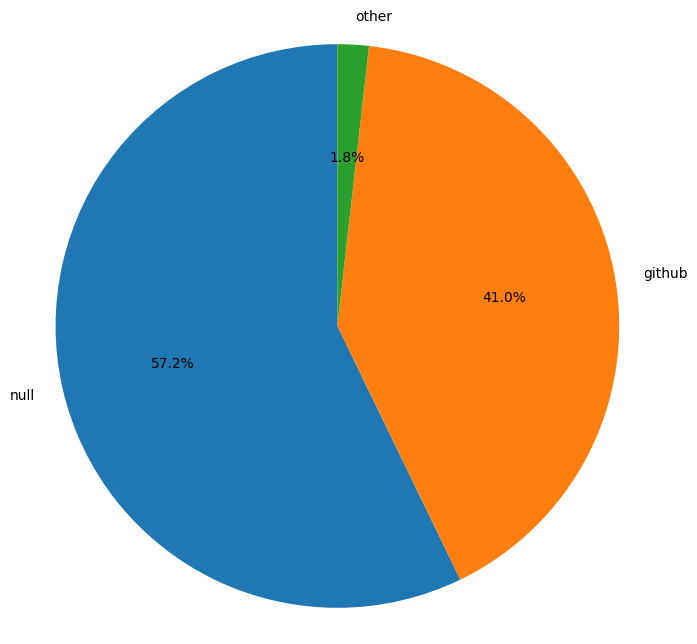

In [36]:
import matplotlib.pyplot as plt

lib_platform_counts = {'null': 4227422, 'github': 3032995, 'gitlab': 72659, 'bitbucket': 53904, 'sourceforge': 5918, 'git-wip-us.apache': 2, 'svn.apache': 2}


labels = list(lib_platform_counts.keys())
sizes = list(lib_platform_counts.values())

threshold = 100000
other_sum = sum([size for size in sizes if size < threshold])
sizes = [size if size >= threshold else 0 for size in sizes]
sizes.append(other_sum)
labels.append("other")

non_zero_sizes = [size for size in sizes if size > 0]
non_zero_labels = [label for i, label in enumerate(labels) if sizes[i] > 0]

plt.figure(figsize=(8, 8))

plt.pie(non_zero_sizes, labels=non_zero_labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

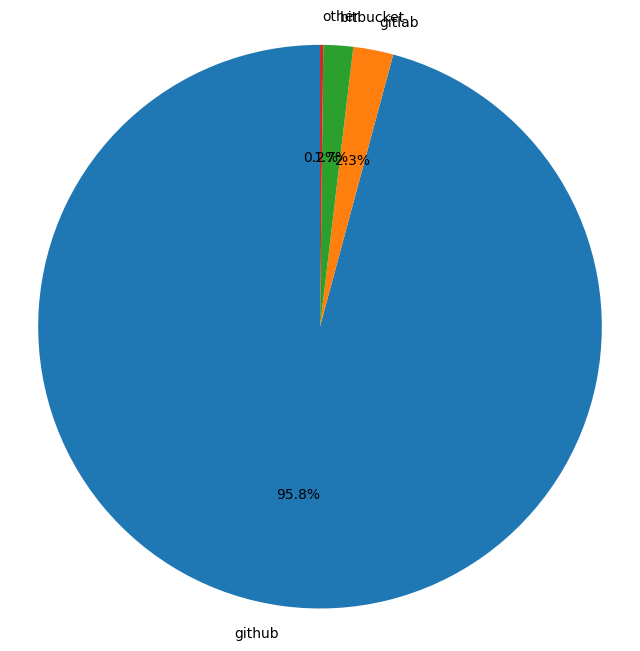

In [38]:
lib_platform_counts_remove_0 = lib_platform_counts.copy()
lib_platform_counts_remove_0['null'] = 0

labels = list(lib_platform_counts_remove_0.keys())
sizes = list(lib_platform_counts_remove_0.values())

threshold = 50000
other_sum = sum([size for size in sizes if size < threshold])
sizes = [size if size >= threshold else 0 for size in sizes]
sizes.append(other_sum)
labels.append("other")

non_zero_sizes = [size for size in sizes if size > 0]
non_zero_labels = [label for i, label in enumerate(labels) if sizes[i] > 0]

plt.figure(figsize=(8, 8))

plt.pie(non_zero_sizes, labels=non_zero_labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

pysrc的优势, 通过request修正了重定向的URL
即

- OSSGadget找到了url, 但是py2src.ossgadget为NaN或者与OSSGadget不同

- 暂时无法统计: 与以上一点不同, py2src仅仅多了一步重定向; py2src.metadata问题在于它的keys不如Libraries.io覆盖面广, 如果keys补上, 且只统计github, 以上两点加在一起可以更好的统计重定向

In [21]:
docs = col.find()

redirect_count_OSSGadget = 0

for doc in docs:
    if isinstance(doc['OSSGadget'], str):
        if not isinstance(doc['py2src.ossgadget'], str) \
            or doc['py2src.ossgadget'] != doc['OSSGadget']:
            redirect = True
            redirect_count_OSSGadget += 1
    
print(redirect_count_OSSGadget)

632166


readthedocs的问题: description中包含了别的项目的doc

py2src的论文中已经有分析了, 罢了